In [30]:
import thinkdsp as td
import numpy as np
PI2 = 2 * np.pi

class WLTrombone(td.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [31]:
low = 220
high = 440
signal = WLTrombone(low, high)
wave = signal.make_wave(duration=1)
wave.apodize()
wave.make_audio()

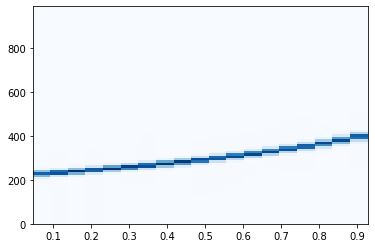

In [33]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)

In [36]:
x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)

In [37]:
x.ts, x.ys
x.ys.shape

(10000,)

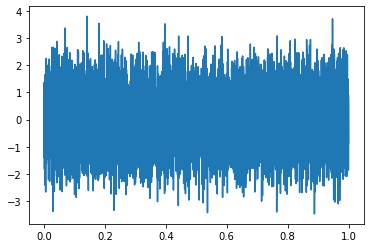

In [38]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)

In [39]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.80684902739562, 0.019086536764852793, 1.0027219853957328)

In [40]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

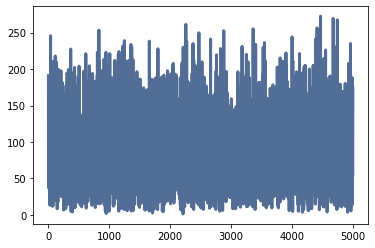

In [41]:
sx.plot()

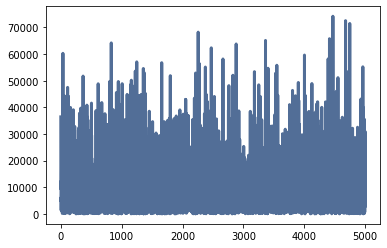

In [42]:
sx.plot_power()

In [43]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

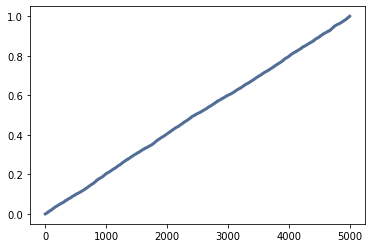

In [44]:
Sx.plot_power()

In [45]:
Sx.estimate_slope()

LinregressResult(slope=0.9824452916217677, intercept=-8.378514656914373, rvalue=0.9993834295260149, pvalue=0.0, stderr=0.00048822218665047043)

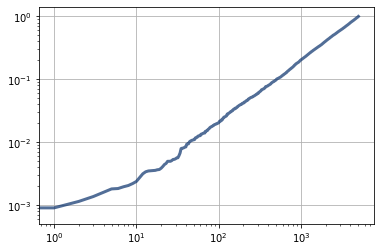

In [46]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [47]:
Sx.estimate_slope()

LinregressResult(slope=0.9824452916217677, intercept=-8.378514656914373, rvalue=0.9993834295260149, pvalue=0.0, stderr=0.00048822218665047043)

In [48]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

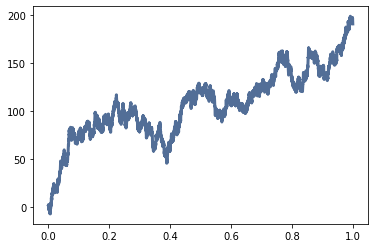

In [49]:
y.plot()

In [50]:
y.ys.max(), y.ys.mean(), y.ys.std()

(198.85772241707897, 106.34686419021003, 36.51483927857064)

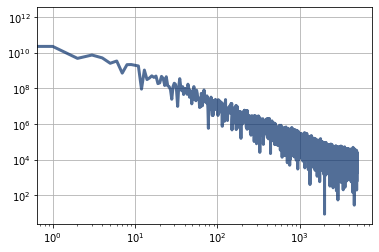

In [51]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

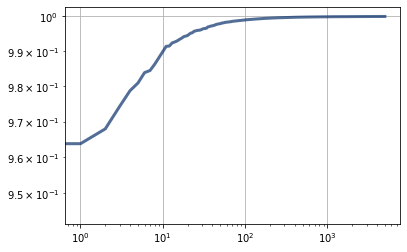

In [52]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [53]:
sy.make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.0005301064958082753, intercept=-0.0041409367111207625, rvalue=0.490867338732861, pvalue=1.4318907504822056e-301, stderr=1.3308706374470916e-05)

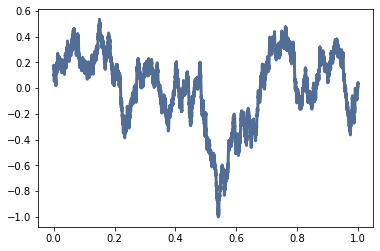

In [54]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [55]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.007757110015255073, intercept=-0.06027059775063807, rvalue=0.3597373436167673, pvalue=1.2278130023830777e-152, stderr=0.0002845921392343952)

In [56]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)

In [57]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


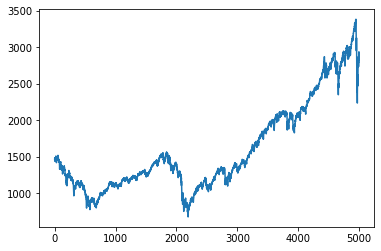

In [58]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [59]:
yWave= td.Wave(ys, framerate= 10000)

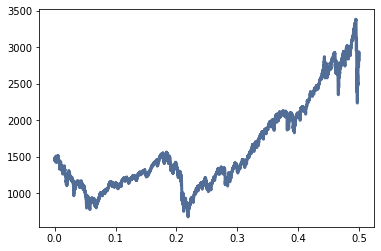

In [60]:
yWave.plot()

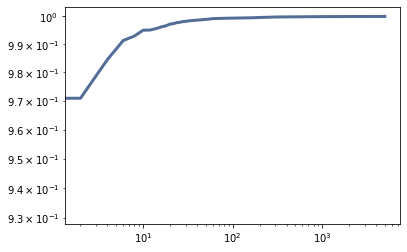

In [61]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [62]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.00032118267557806565, intercept=-0.0025138728815941023, rvalue=0.42786931354255375, pvalue=7.735021238915466e-112, stderr=1.3574898947827898e-05)

In [63]:
# integrated_spectrum 之 log-log slope= .0003 近似於 0，
# 近似Brownian Noise